In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt

In [3]:
import random
import numpy as np
import torch

# DQN

In [4]:
import gymnasium as gym
from utils.replay_buffer import ReplayBuffer
from policies.dqn import DQN
from torch import nn

env = gym.make("CartPole-v1", max_episode_steps=200)

module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2)
)
policy = DQN(
    nn_module=module,
    state_dim=4,
    action_dim=2,
    lr=2e-3,
    eps=0.01,
    gamma=0.98,
)

results = []

In [5]:
buffer_size = 10000
minimal_size = 500
batch_size = 64

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [7]:
buffer = ReplayBuffer(capacity=buffer_size)

for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    while not terminated and not truncated:
        action = policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)
        buffer.add(prev_obs, action, reward, observation, terminated, truncated)
        epi_len += 1
        total_return += reward

        if buffer.size() > minimal_size:
            sampled = buffer.sample(batch_size)
            policy.update(sampled)
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results.append((epi_len, total_return))
env.close()


epi: 0; len: 11; return: 11.0
epi: 1; len: 11; return: 11.0
epi: 2; len: 11; return: 11.0
epi: 3; len: 11; return: 11.0
epi: 4; len: 11; return: 11.0
epi: 5; len: 11; return: 11.0
epi: 6; len: 11; return: 11.0
epi: 7; len: 11; return: 11.0
epi: 8; len: 11; return: 11.0
epi: 9; len: 8; return: 8.0
epi: 10; len: 11; return: 11.0
epi: 11; len: 11; return: 11.0
epi: 12; len: 11; return: 11.0
epi: 13; len: 11; return: 11.0
epi: 14; len: 11; return: 11.0
epi: 15; len: 11; return: 11.0
epi: 16; len: 11; return: 11.0
epi: 17; len: 11; return: 11.0
epi: 18; len: 11; return: 11.0
epi: 19; len: 11; return: 11.0
epi: 20; len: 11; return: 11.0
epi: 21; len: 11; return: 11.0
epi: 22; len: 11; return: 11.0
epi: 23; len: 11; return: 11.0
epi: 24; len: 11; return: 11.0
epi: 25; len: 11; return: 11.0
epi: 26; len: 11; return: 11.0
epi: 27; len: 11; return: 11.0
epi: 28; len: 11; return: 11.0
epi: 29; len: 11; return: 11.0
epi: 30; len: 11; return: 11.0
epi: 31; len: 11; return: 11.0
epi: 32; len: 11; re

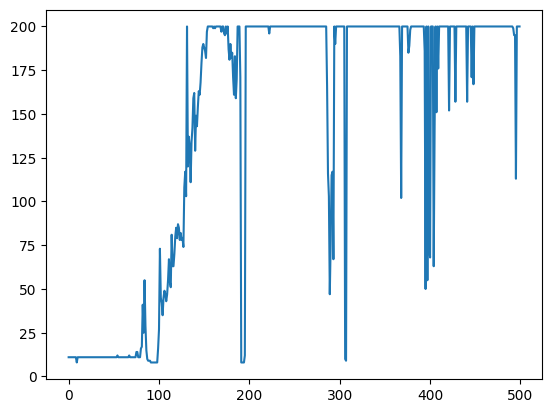

In [8]:
plt.plot([p[0] for p in results])

In [9]:
len(results)

500

# REINFORCE

In [10]:
from policies.reinforce import REINFORCE

In [11]:
nn_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
r_policy = REINFORCE(
    module=nn_module,
    gamma=0.98
)
results_r = []

In [12]:
for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    states, rewards, actions = [], [], []
    while not terminated and not truncated:
        action = r_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        states.append(prev_obs)
        rewards.append(reward)
        actions.append(action)
        
        epi_len += 1
        total_return += reward

    r_policy.update((states, rewards, actions))
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results_r.append((epi_len, total_return))
env.close()


epi: 0; len: 15; return: 15.0


/Users/yichen/Documents/SchoolWk/research/rl-learn/env/lib/python3.11/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epi: 1; len: 17; return: 17.0
epi: 2; len: 21; return: 21.0
epi: 3; len: 30; return: 30.0
epi: 4; len: 15; return: 15.0
epi: 5; len: 14; return: 14.0
epi: 6; len: 11; return: 11.0
epi: 7; len: 18; return: 18.0
epi: 8; len: 16; return: 16.0
epi: 9; len: 13; return: 13.0
epi: 10; len: 11; return: 11.0
epi: 11; len: 52; return: 52.0
epi: 12; len: 23; return: 23.0
epi: 13; len: 39; return: 39.0
epi: 14; len: 20; return: 20.0
epi: 15; len: 16; return: 16.0
epi: 16; len: 30; return: 30.0
epi: 17; len: 12; return: 12.0
epi: 18; len: 19; return: 19.0
epi: 19; len: 18; return: 18.0
epi: 20; len: 15; return: 15.0
epi: 21; len: 20; return: 20.0
epi: 22; len: 16; return: 16.0
epi: 23; len: 21; return: 21.0
epi: 24; len: 22; return: 22.0
epi: 25; len: 12; return: 12.0
epi: 26; len: 20; return: 20.0
epi: 27; len: 107; return: 107.0
epi: 28; len: 32; return: 32.0
epi: 29; len: 33; return: 33.0
epi: 30; len: 24; return: 24.0
epi: 31; len: 19; return: 19.0
epi: 32; len: 14; return: 14.0
epi: 33; len: 1

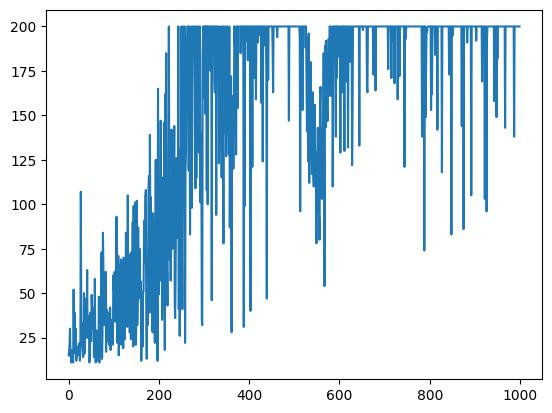

In [13]:
plt.plot([p[0] for p in results_r])